## Telebirr app user feedback webscrap analysis from playstore

**steps undertaken**
1. install necessarry libraries
2. import required libraries
3. import data using unique app ID
4. extract reviews text
5. remove stop words, panctuation, emojis
6. perform sentiment analysis and generate word clouds for 1star and 5star rate

In [3]:
pip install google-play-scraper

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_theme(color_codes=True)
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import string
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
from google_play_scraper import app, reviews, Sort

def scrap_google_play_reviews(app_id):
    review_list, _ = reviews(app_id, lang='en', country='us', sort=Sort.NEWEST)
    reviews_df = pd.DataFrame(review_list)
    reviews_df = reviews_df[['score', 'content']]
    reviews_df.columns = ['rating', 'review']
    return reviews_df
app_id = 'cn.tydic.ethiopay'  # telebirr app ID
reviews = scrap_google_play_reviews(app_id)


In [7]:
reviews

,rating,review
0,5,good app
1,5,ماشاء الله
2,5,It is best
3,1,Good
4,5,Good
...,...,...
95,5,"ዎውው wonderful app, i like this app"
96,2,Can not work on my device olease
97,3,Fantastics
98,2,👍


In [9]:
def remove_stopwords(text):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Define additional stopwords
    additional_stopwords = ['app', 'appi', 'telebirr', 'tele']

    # Remove stopwords
    stop_words = set(stopwords.words('english')).union(additional_stopwords)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

    # Join tokens back into a single string
    processed_text = ' '.join(filtered_tokens)
    return processed_text

In [10]:
def remove_emojis(text):
    # Remove emojis using regular expression
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"
                               u"\U0001F300-\U0001F5FF"
                               u"\U0001F680-\U0001F6FF"
                               u"\U0001F1E0-\U0001F1FF"
                               u"\U00002500-\U00002BEF"
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    processed_text = emoji_pattern.sub(r'', text)
    return processed_text

In [11]:
def remove_punctuation(text):
    # Remove punctuation using string.punctuation
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    return text

In [12]:
# Filter reviews by rating
one_star_reviews = reviews[reviews['rating'] == 1]['review']
five_star_reviews = reviews[reviews['rating'] == 5]['review']

In [13]:
# Preprocess one-star reviews
one_star_reviews = one_star_reviews.apply(remove_stopwords)
one_star_reviews = one_star_reviews.apply(remove_emojis)
one_star_reviews = one_star_reviews.apply(remove_punctuation)

In [14]:
# Preprocess five-star reviews
five_star_reviews = five_star_reviews.apply(remove_stopwords)
five_star_reviews = five_star_reviews.apply(remove_emojis)
five_star_reviews = five_star_reviews.apply(remove_punctuation)

In [15]:
# Join all one-star reviews into a single sentence
one_star_text = ' '.join(one_star_reviews)

# Join all five-star reviews into a single sentence
five_star_text = ' '.join(five_star_reviews)

In [16]:
# Generate word cloud for one-star reviews
one_star_wordcloud = WordCloud().generate(one_star_text)

# Generate word cloud for five-star reviews
five_star_wordcloud = WordCloud().generate(five_star_text)

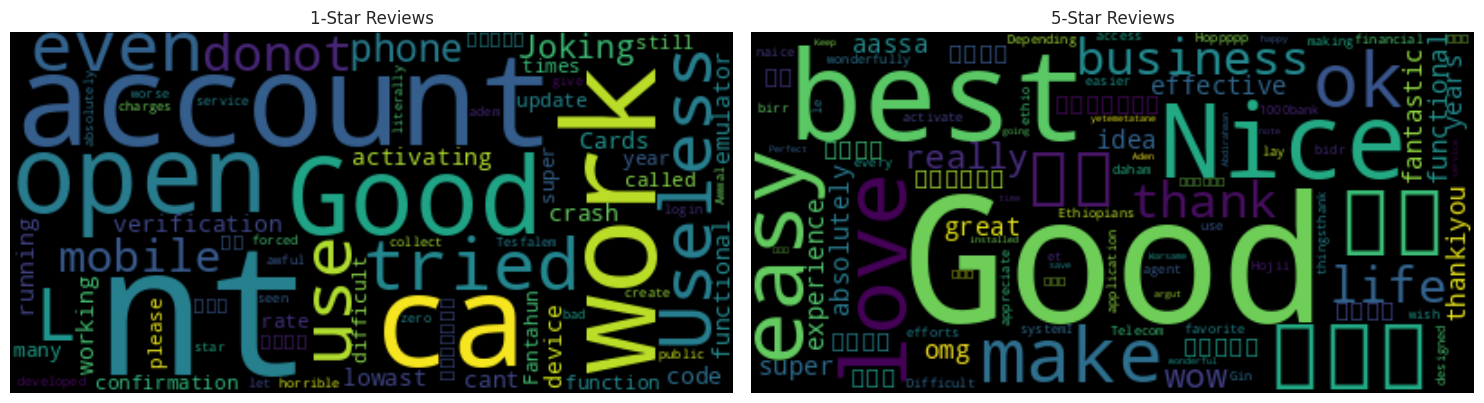

In [17]:
# Plot the word clouds
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.imshow(one_star_wordcloud, interpolation='bilinear')
plt.title('1-Star Reviews')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(five_star_wordcloud, interpolation='bilinear')
plt.title('5-Star Reviews')
plt.axis('off')

plt.tight_layout()
plt.show()

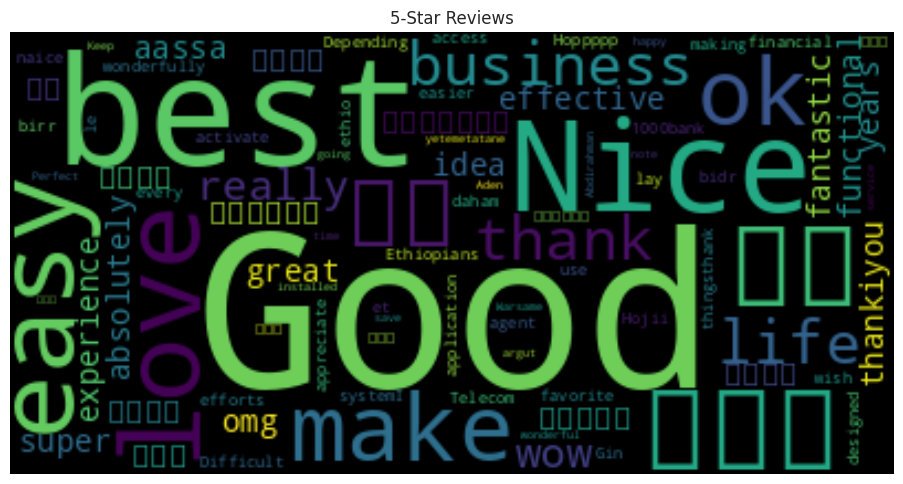

In [18]:
plt.figure(figsize=(10, 5))
plt.imshow(five_star_wordcloud, interpolation='bilinear')
plt.title('5-Star Reviews')
plt.axis('off')
plt.tight_layout()
plt.show()

(-0.5, 399.5, 199.5, -0.5)

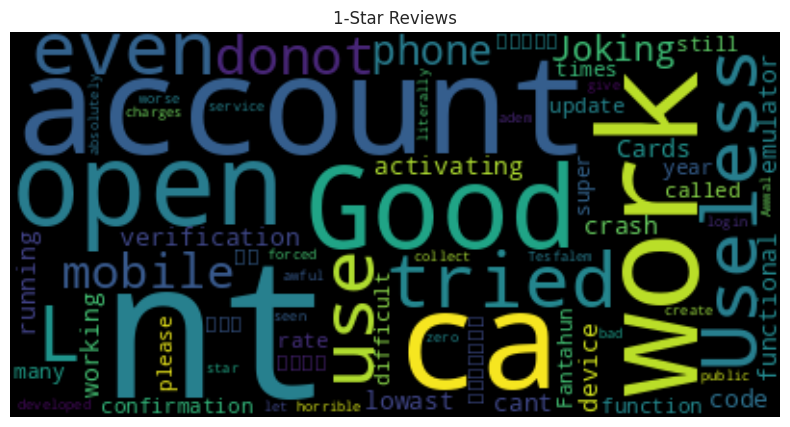

In [19]:
plt.figure(figsize=(10, 5))
plt.imshow(one_star_wordcloud, interpolation='bilinear')
plt.title('1-Star Reviews')
plt.axis('off')